## 0. Import necessary libraries

In [1]:
# import necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score

## 1. Load and understanding of data

In [3]:
# load and understand the data

data = pd.read_csv('train.csv')
data.shape

(69999, 172)

In [4]:
# view few columns

data.head()

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,...,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
0,0,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,31.277,87.009,...,0,0,NaN,NaN,NaN,1958,0.0,0.0,0.0,0
1,1,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,0.000,122.787,...,0,0,NaN,1.0,NaN,710,0.0,0.0,0.0,0
2,2,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,60.806,103.176,...,0,0,NaN,NaN,NaN,882,0.0,0.0,0.0,0
3,3,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,156.362,205.260,...,0,0,NaN,NaN,NaN,982,0.0,0.0,0.0,0
4,4,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,240.708,128.191,...,1,0,1.0,1.0,1.0,647,0.0,0.0,0.0,0


## 2. Clean and pre-process the data

In [5]:
# check null values

nullCols = data.columns[data.isnull().mean() * 100 > 0]
data[nullCols].isnull().mean() * 100

loc_og_t2o_mou           1.002871
std_og_t2o_mou           1.002871
loc_ic_t2o_mou           1.002871
last_date_of_month_7     0.570008
last_date_of_month_8     1.047158
                          ...    
night_pck_user_7        74.478207
night_pck_user_8        73.689624
fb_user_6               74.902499
fb_user_7               74.478207
fb_user_8               73.689624
Length: 125, dtype: float64

In [6]:
data = data.drop(columns = ['last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8', 'date_of_last_rech_data_6',
                            'date_of_last_rech_data_7', 'date_of_last_rech_data_8'], axis=1)

In [7]:
data['date_of_last_rech_6'] = pd.to_datetime(data['date_of_last_rech_6']).dt.weekday
data['date_of_last_rech_6'] = data['date_of_last_rech_6'].fillna(7.0) # indicates no recharge

data['date_of_last_rech_7'] = pd.to_datetime(data['date_of_last_rech_6']).dt.weekday
data['date_of_last_rech_7'] = data['date_of_last_rech_6'].fillna(7.0) # indicates no recharge

data['date_of_last_rech_8'] = pd.to_datetime(data['date_of_last_rech_6']).dt.weekday
data['date_of_last_rech_8'] = data['date_of_last_rech_6'].fillna(7.0) # indicates no recharge

In [8]:
# fill nulls with 0

data = data.fillna(0)

In [9]:
# drop few non essential columns

data = data.drop(columns=['id', 'circle_id'], axis=1)

In [10]:
# final data

data.head()

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,...,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
0,0.0,0.0,0.0,31.277,87.009,7.527,48.58,124.38,1.29,32.24,...,0,0,0.0,0.0,0.0,1958,0.0,0.0,0.0,0
1,0.0,0.0,0.0,0.000,122.787,42.953,0.00,0.00,0.00,0.00,...,0,0,0.0,1.0,0.0,710,0.0,0.0,0.0,0
2,0.0,0.0,0.0,60.806,103.176,0.000,0.53,15.93,0.00,53.99,...,0,0,0.0,0.0,0.0,882,0.0,0.0,0.0,0
3,0.0,0.0,0.0,156.362,205.260,111.095,7.26,16.01,0.00,68.76,...,0,0,0.0,0.0,0.0,982,0.0,0.0,0.0,0
4,0.0,0.0,0.0,240.708,128.191,101.565,21.28,4.83,6.13,56.99,...,1,0,1.0,1.0,1.0,647,0.0,0.0,0.0,0


## 3. Basic EDA

In [11]:
# identify some important features based on domain understanding

impFeatures = ['total_rech_amt_6', 'total_rech_amt_7', 'total_rech_amt_8','total_og_mou_6', 'total_og_mou_7', 'total_og_mou_8', 'offnet_mou_6',
               'offnet_mou_7', 'offnet_mou_8', 'vol_3g_mb_6','vol_3g_mb_7','vol_3g_mb_8', 'vol_2g_mb_6', 'vol_2g_mb_7', 'vol_2g_mb_8', 'aon']

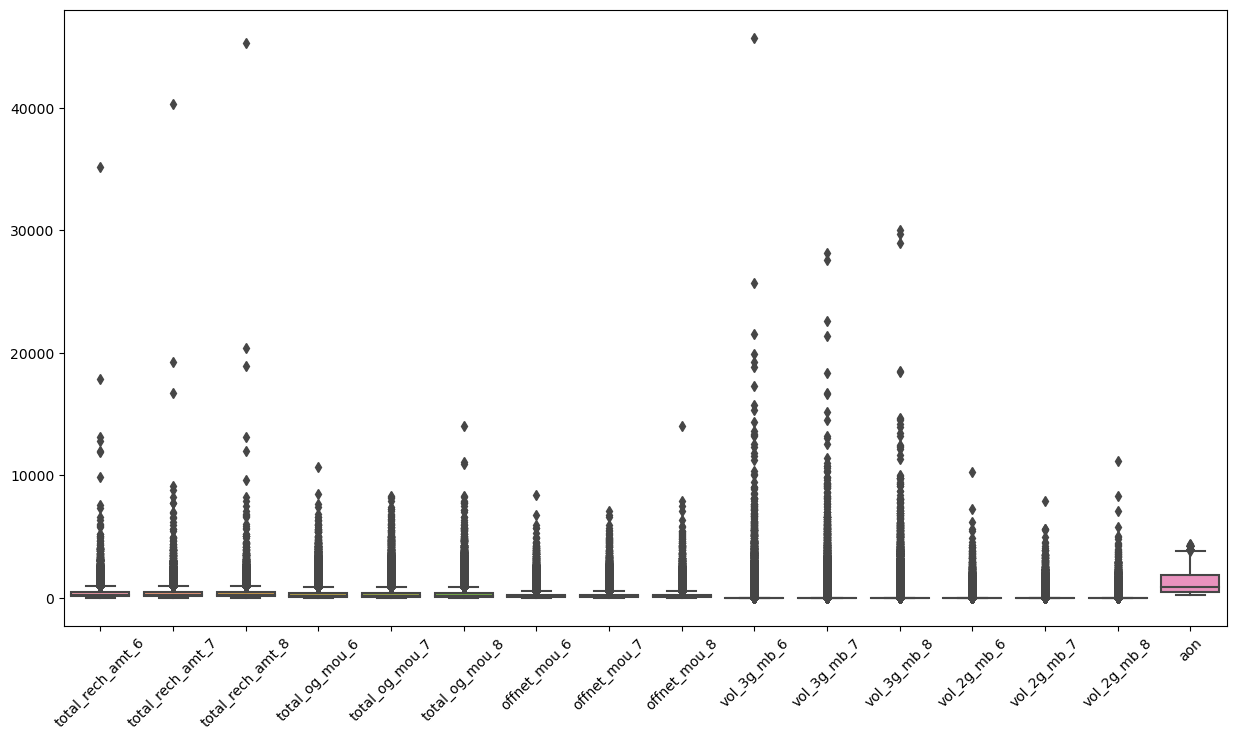

In [12]:
# analyse the distribution of important domain features

plt.figure(figsize=(15,8))
plt.xticks(rotation=45)
sns.boxplot(data[impFeatures])
plt.show()

In [13]:
# handling outliers using k-sigma method

def cap_outliers(array, k=3):
    upper_limit = array.mean() + k*array.std()
    lower_limit = array.mean() - k*array.std()
    array[array<lower_limit] = lower_limit
    array[array>upper_limit] = upper_limit
    return array

In [14]:
# handling outliers

data = data.apply(cap_outliers, axis=0)

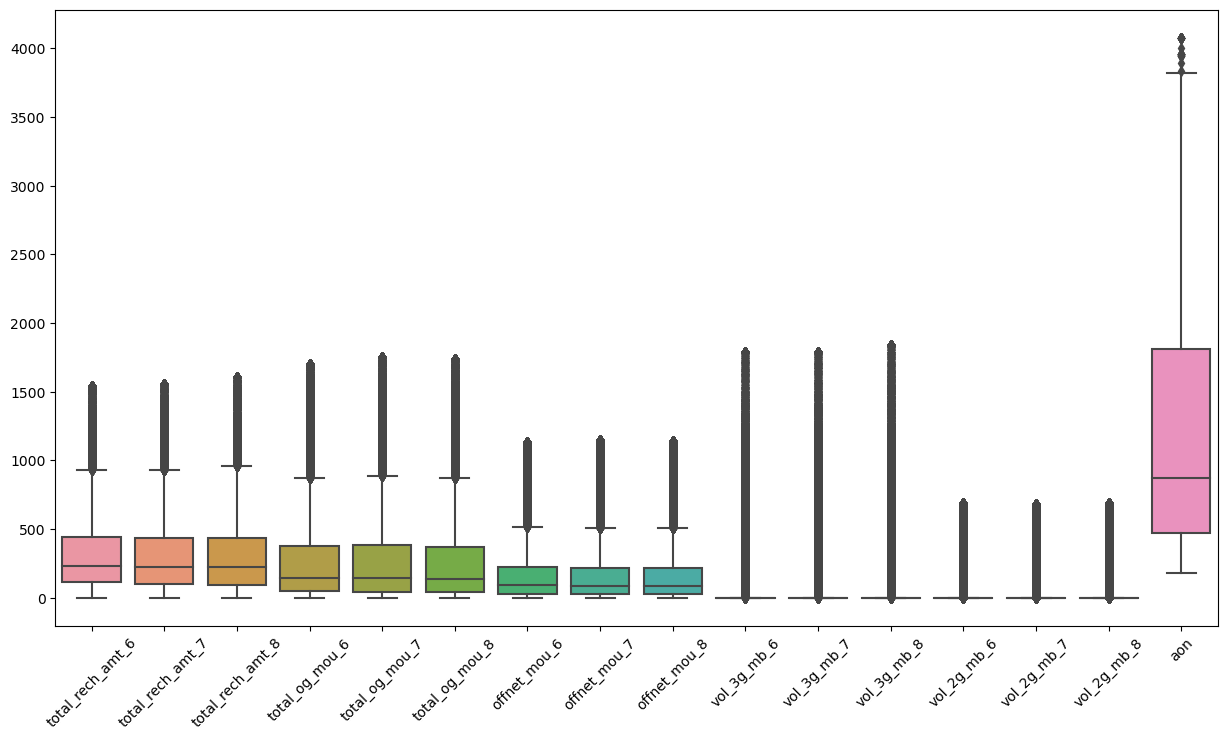

In [15]:
# again check the distribution of important features

plt.figure(figsize=(15,8))
plt.xticks(rotation=45)
sns.boxplot(data[impFeatures])
plt.show()

By looking above box plot we can say that the significant amount of outliers have removed from the data.

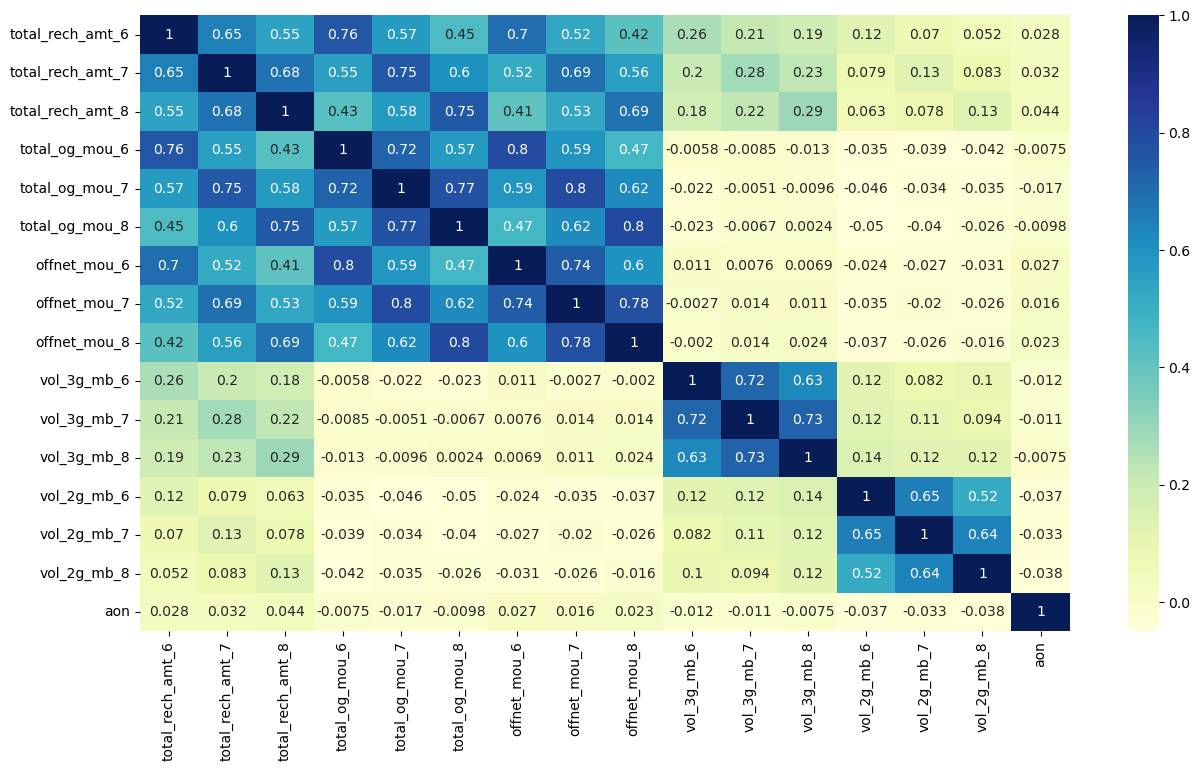

In [16]:
# check correlations

plt.figure(figsize=(15,8))
sns.heatmap(data[impFeatures].corr(), cmap='YlGnBu', annot=True)
plt.show()

From above correlation chart we can say that there is very less amount of multicollinearity is present in the data.

## 4. Deriving some new features

In [17]:
# derive change between onnet and offnet across the 3 months
data['onnet_offnet_6'] = data['onnet_mou_6'] - data['offnet_mou_6']
data['onnet_offnet_7'] = data['onnet_mou_7'] - data['offnet_mou_7']
data['onnet_offnet_8'] = data['onnet_mou_8'] - data['offnet_mou_8']


# derive change of roaming incoming and outgoiung across the 3 months
data['roam_ic_og_6'] = data['roam_ic_mou_6'] - data['roam_og_mou_6']
data['roam_ic_og_7'] = data['roam_ic_mou_7'] - data['roam_og_mou_7']
data['roam_ic_og_8'] = data['roam_ic_mou_8'] - data['roam_og_mou_8']


# derive change of average revenue per user between months
data['arpu_6_7'] = data['arpu_6'] - data['arpu_7']
data['arpu_7_8'] = data['arpu_7'] - data['arpu_8']


# derive change of reacharge and usage amount
data['mou_reach_amnt_diff_6'] =  data['total_rech_amt_6'] - data['total_og_mou_6']
data['mou_reach_amnt_diff_7'] =  data['total_rech_amt_7'] - data['total_og_mou_7']
data['mou_reach_amnt_diff_8'] =  data['total_rech_amt_8'] - data['total_og_mou_8']

## 5. Data preprocessing

In [18]:
# create X and y

X = data.drop(columns = 'churn_probability', axis=1)
y = data['churn_probability']

In [19]:
# split into train and test

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=100)

## 6. Build model

In [20]:
# build random forest for classification

rfc = RandomForestClassifier(n_estimators=200, min_samples_leaf=5, n_jobs=-1, random_state=100)
rfc.fit(X_train, y_train)

RandomForestClassifier(min_samples_leaf=5, n_estimators=200, n_jobs=-1,
                       random_state=100)

In [21]:
# utility to compute some metrics

def printMetrics(y_true, y_pred):
    print('Accuracy = ', accuracy_score(y_true, y_pred))
    print('Precision = ', precision_score(y_true, y_pred))
    print('Recall = ', recall_score(y_true, y_pred))
    print('F1 = ', f1_score(y_true, y_pred))

In [22]:
# prediction probabilities

y_train_pred_prob = rfc.predict_proba(X_train)

In [23]:
# define cutoff probabilities

probabilities = np.arange(0, 1, 0.05)

predictions_df = pd.DataFrame({
    'Predicted Probability': y_train_pred_prob[:,1],
})

In [24]:
# make predictions in each of cutoff

accuracyScores = []
precisionScores = []
recallScores = []
sensitivityScores = []
specificityScores = []


for p in probabilities:
    y_train_pred = predictions_df['Predicted Probability'].map(lambda x: 1 if x > p else 0)
    predictions_df['p={}'.format(p)] = y_train_pred
    
    accuracyScores.append(round(accuracy_score(y_train, y_train_pred), 2))
    precisionScores.append(round(precision_score(y_train, y_train_pred), 2))
    recallScores.append(round(recall_score(y_train, y_train_pred), 2))
    
    mat = confusion_matrix(y_train, y_train_pred)
    
    TN = mat[0][0]
    FP = mat[0][1]
    FN = mat[1][0]
    TP = mat[1][1]

    sensi = 𝑇𝑃 / (𝑇𝑃+𝐹N)
    speci = 𝑇𝑁 / (𝑇𝑁+𝐹P)
    
    sensitivityScores.append(round(sensi, 2))
    specificityScores.append(round(speci, 2))

    

cutoffs = pd.DataFrame()
cutoffs['Cutoff Probability'] = probabilities
cutoffs['Accuracy'] = accuracyScores
cutoffs['Precision'] = precisionScores
cutoffs['Recall'] = recallScores
cutoffs['Sensitivity'] = sensitivityScores
cutoffs['Specificity'] = specificityScores

In [25]:
# view of predictions on various cutoffs

predictions_df.head()

,Predicted Probability,p=0.0,p=0.05,p=0.1,p=0.15000000000000002,p=0.2,p=0.25,p=0.30000000000000004,p=0.35000000000000003,p=0.4,...,p=0.5,p=0.55,p=0.6000000000000001,p=0.65,p=0.7000000000000001,p=0.75,p=0.8,p=0.8500000000000001,p=0.9,p=0.9500000000000001
0,0.019863,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0.019147,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0.007088,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0.001667,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0.017849,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [26]:
# view of cutoffs

cutoffs

,Cutoff Probability,Accuracy,Precision,Recall,Sensitivity,Specificity
0,0.00,0.14,0.11,1.00,1.00,0.04
1,0.05,0.83,0.38,1.00,1.00,0.81
2,0.10,0.92,0.56,1.00,1.00,0.91
3,0.15,0.95,0.69,1.00,1.00,0.95
4,0.20,0.97,0.76,0.98,0.98,0.97
5,0.25,0.97,0.80,0.94,0.94,0.97
6,0.30,0.97,0.82,0.90,0.90,0.98
7,0.35,0.97,0.84,0.86,0.86,0.98
8,0.40,0.97,0.85,0.80,0.80,0.98
9,0.45,0.96,0.87,0.75,0.75,0.99


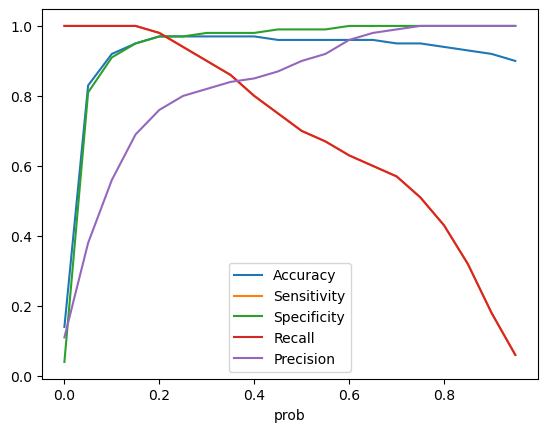

In [27]:
# plot the metrics

plt.plot(probabilities, cutoffs['Accuracy'], label = 'Accuracy')
plt.plot(probabilities, cutoffs['Sensitivity'], label = 'Sensitivity')
plt.plot(probabilities, cutoffs['Specificity'], label = 'Specificity')
plt.plot(probabilities, cutoffs['Recall'], label = 'Recall')
plt.plot(probabilities, cutoffs['Precision'], label = 'Precision')
plt.xlabel('prob')
plt.legend(loc='best')

plt.show()

From above plot, the best cutoff probability is 0.35.

In [28]:
# predictions on train set

y_train_pred = []
cutoff = 0.35

for p in y_train_pred_prob[:,1]:
    if p > cutoff:
        y_train_pred.append(1)
    else:
        y_train_pred.append(0)
        
y_train_pred = np.array(y_train_pred)

In [29]:
# model evaluation on train set

printMetrics(y_train, y_train_pred)

Accuracy =  0.9681830241433499
Precision =  0.8370197904540163
Recall =  0.8571428571428571
F1 =  0.8469618140767644


In [30]:
confusion_matrix(y_train, y_train_pred)

array([[43126,   840],
       [  719,  4314]], dtype=int64)

In [31]:
# predictions on test set

y_test_pred_prob = rfc.predict_proba(X_test)
y_test_pred = []

for p in y_test_pred_prob[:,1]:
    if p > cutoff:
        y_test_pred.append(1)
    else:
        y_test_pred.append(0)
        
y_test_pred = np.array(y_test_pred)

In [32]:
# model evaluation on test set

printMetrics(y_test, y_test_pred)

Accuracy =  0.9425714285714286
Precision =  0.7371216144450345
Recall =  0.6612672701286327
F1 =  0.6971371170266197


In [33]:
confusion_matrix(y_test, y_test_pred)

array([[18406,   495],
       [  711,  1388]], dtype=int64)

Above model has train accuracy is 96.81% and test accuracy is 94.25%, which is acceptable as model is not overfiting on unseen data.

## 7. Prepare submission data

In [34]:
# load submission data

subData = pd.read_csv('test.csv')
subData.shape

(30000, 171)

In [35]:
# check null values in submission data

subData.isnull().mean() * 100

id                 0.000000
circle_id          0.000000
loc_og_t2o_mou     1.053333
std_og_t2o_mou     1.053333
loc_ic_t2o_mou     1.053333
                    ...    
fb_user_8         73.593333
aon                0.000000
aug_vbc_3g         0.000000
jul_vbc_3g         0.000000
jun_vbc_3g         0.000000
Length: 171, dtype: float64

In [36]:
subData = subData.drop(columns = ['last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8', 
                                  'date_of_last_rech_data_6', 'date_of_last_rech_data_7', 'date_of_last_rech_data_8'], axis=1)

In [37]:
subData['date_of_last_rech_6'] = pd.to_datetime(subData['date_of_last_rech_6']).dt.weekday
subData['date_of_last_rech_6'] = subData['date_of_last_rech_6'].fillna(7.0) # indicates no recharge

subData['date_of_last_rech_7'] = pd.to_datetime(subData['date_of_last_rech_6']).dt.weekday
subData['date_of_last_rech_7'] = subData['date_of_last_rech_6'].fillna(7.0) # indicates no recharge

subData['date_of_last_rech_8'] = pd.to_datetime(subData['date_of_last_rech_6']).dt.weekday
subData['date_of_last_rech_8'] = subData['date_of_last_rech_6'].fillna(7.0) # indicates no recharge

In [38]:
# fill null values with 0

subData = subData.fillna(0)

In [39]:
# prepare final predictions 

finalPredictions = pd.DataFrame({
    'id': subData['id']
})

In [40]:
# drop few non essential columns

subData = subData.drop(columns=['id', 'circle_id'], axis=1)

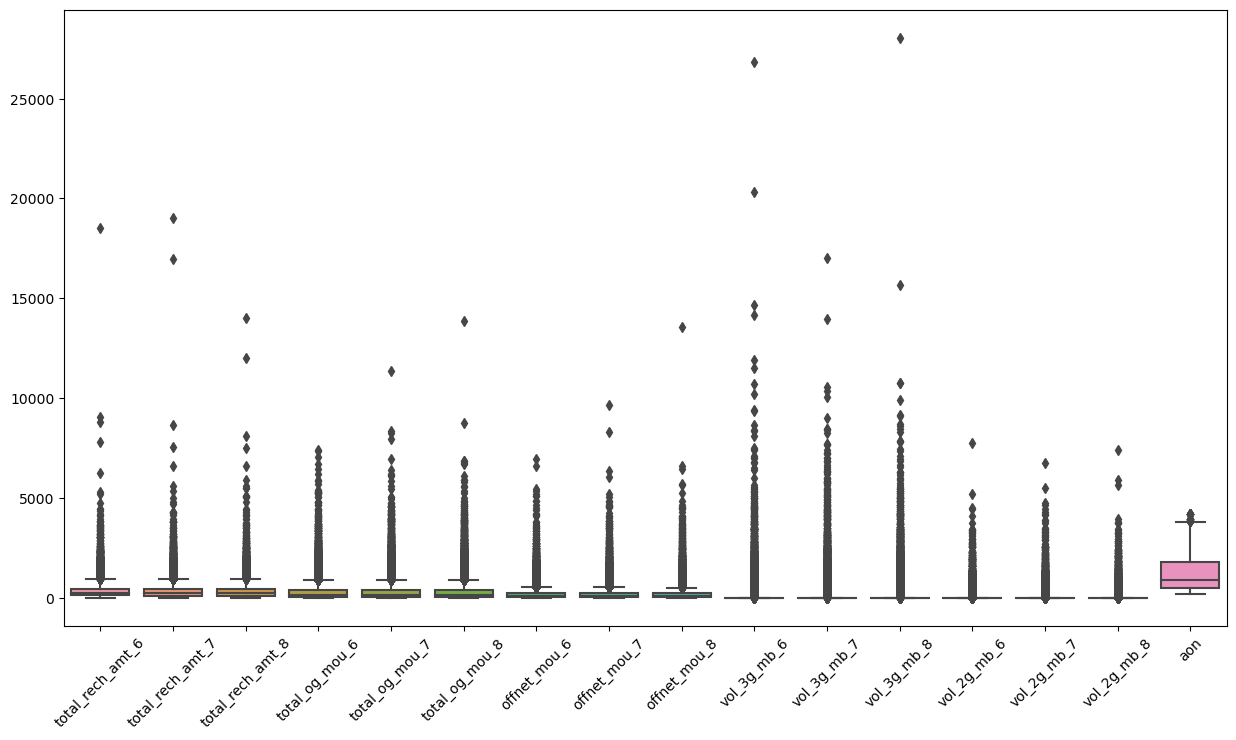

In [41]:
# analyse the distribution of important domain features

plt.figure(figsize=(15,8))
plt.xticks(rotation=45)
sns.boxplot(subData[impFeatures])
plt.show()

In [42]:
# handling outliers

subData = subData.apply(cap_outliers, axis=0)

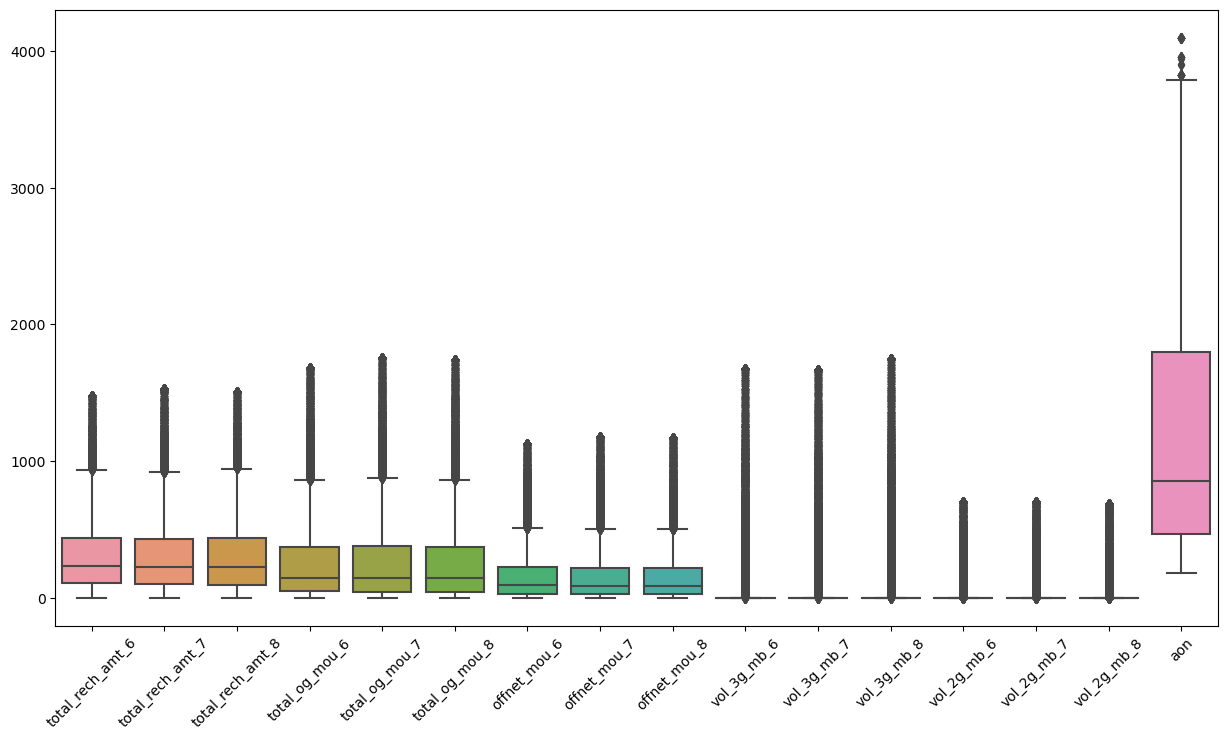

In [43]:
# again check the distribution of important domain features

plt.figure(figsize=(15,8))
plt.xticks(rotation=45)
sns.boxplot(subData[impFeatures])
plt.show()

In [44]:
# derive new metrics

# derive change between onnet and offnet across the 3 months

subData['onnet_offnet_6'] = subData['onnet_mou_6'] - subData['offnet_mou_6']
subData['onnet_offnet_7'] = subData['onnet_mou_7'] - subData['offnet_mou_7']
subData['onnet_offnet_8'] = subData['onnet_mou_8'] - subData['offnet_mou_8']

# derive change of roaming incoming and outgoiung across the 3 months

subData['roam_ic_og_6'] = subData['roam_ic_mou_6'] - subData['roam_og_mou_6']
subData['roam_ic_og_7'] = subData['roam_ic_mou_7'] - subData['roam_og_mou_7']
subData['roam_ic_og_8'] = subData['roam_ic_mou_8'] - subData['roam_og_mou_8']

# derive change of average revenue per user between months

subData['arpu_6_7'] = subData['arpu_6'] - subData['arpu_7']
subData['arpu_7_8'] = subData['arpu_7'] - subData['arpu_8']

# derive change of reacharge and usage amount

subData['mou_reach_amnt_diff_6'] =  subData['total_rech_amt_6'] - subData['total_og_mou_6']
subData['mou_reach_amnt_diff_7'] =  subData['total_rech_amt_7'] - subData['total_og_mou_7']
subData['mou_reach_amnt_diff_8'] =  subData['total_rech_amt_8'] - subData['total_og_mou_8']

In [45]:
# Create X & y for train

X = data.drop(columns = 'churn_probability', axis=1)
y = data['churn_probability']

In [46]:
# train on model

rfc_final = RandomForestClassifier(n_estimators=200, min_samples_leaf=5, n_jobs=-1, random_state=100)
rfc_final.fit(X, y)

RandomForestClassifier(min_samples_leaf=5, n_estimators=200, n_jobs=-1,
                       random_state=100)

In [47]:
# prediction probabilities

y_train_pred_prob = rfc_final.predict_proba(X)

In [48]:
# define cutoff probabilities

probabilities = np.arange(0, 1, 0.05)

predictions_df = pd.DataFrame({
    'Predicted Probability': y_train_pred_prob[:,1],
})

In [49]:
# make predictions in each of cutoff

accuracyScores = []
precisionScores = []
recallScores = []
sensitivityScores = []
specificityScores = []


for p in probabilities:
    y_train_pred = predictions_df['Predicted Probability'].map(lambda x: 1 if x > p else 0)
    predictions_df['p={}'.format(p)] = y_train_pred
    
    accuracyScores.append(round(accuracy_score(y, y_train_pred), 2))
    precisionScores.append(round(precision_score(y, y_train_pred), 2))
    recallScores.append(round(recall_score(y, y_train_pred), 2))
    
    mat = confusion_matrix(y, y_train_pred)
    
    TN = mat[0][0]
    FP = mat[0][1]
    FN = mat[1][0]
    TP = mat[1][1]

    sensi = 𝑇𝑃 / (𝑇𝑃+𝐹N)
    speci = 𝑇𝑁 / (𝑇𝑁+𝐹P)
    
    sensitivityScores.append(round(sensi, 2))
    specificityScores.append(round(speci, 2))

    

cutoffs = pd.DataFrame()
cutoffs['Cutoff Probability'] = probabilities
cutoffs['Accuracy'] = accuracyScores
cutoffs['Precision'] = precisionScores
cutoffs['Recall'] = recallScores
cutoffs['Sensitivity'] = sensitivityScores
cutoffs['Specificity'] = specificityScores

In [50]:
# view of predictions on various cutoffs

predictions_df.head()

,Predicted Probability,p=0.0,p=0.05,p=0.1,p=0.15000000000000002,p=0.2,p=0.25,p=0.30000000000000004,p=0.35000000000000003,p=0.4,...,p=0.5,p=0.55,p=0.6000000000000001,p=0.65,p=0.7000000000000001,p=0.75,p=0.8,p=0.8500000000000001,p=0.9,p=0.9500000000000001
0,0.053071,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0.083921,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0.037701,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0.041453,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0.025749,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [51]:
# view of cutoffs

cutoffs

,Cutoff Probability,Accuracy,Precision,Recall,Sensitivity,Specificity
0,0.00,0.14,0.11,1.00,1.00,0.05
1,0.05,0.83,0.38,1.00,1.00,0.82
2,0.10,0.92,0.56,1.00,1.00,0.91
3,0.15,0.95,0.68,1.00,1.00,0.95
4,0.20,0.97,0.76,0.98,0.98,0.96
5,0.25,0.97,0.80,0.94,0.94,0.97
6,0.30,0.97,0.82,0.90,0.90,0.98
7,0.35,0.97,0.84,0.86,0.86,0.98
8,0.40,0.97,0.85,0.81,0.81,0.98
9,0.45,0.96,0.88,0.76,0.76,0.99


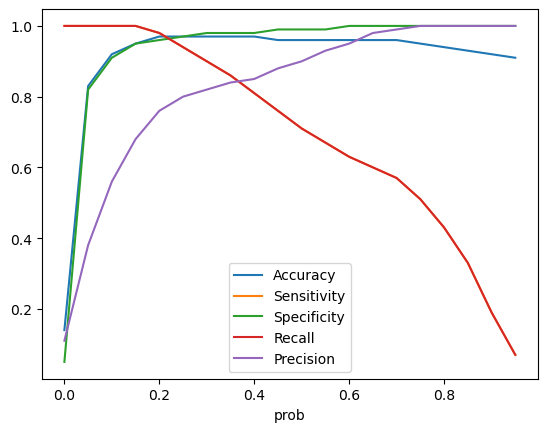

In [52]:
# plot the metrics

plt.plot(probabilities, cutoffs['Accuracy'], label = 'Accuracy')
plt.plot(probabilities, cutoffs['Sensitivity'], label = 'Sensitivity')
plt.plot(probabilities, cutoffs['Specificity'], label = 'Specificity')
plt.plot(probabilities, cutoffs['Recall'], label = 'Recall')
plt.plot(probabilities, cutoffs['Precision'], label = 'Precision')
plt.xlabel('prob')
plt.legend(loc='best')

plt.show()

In [53]:
# predictions on train set

y_train_pred = []
cutoff = 0.35

for p in y_train_pred_prob[:,1]:
    if p > cutoff:
        y_train_pred.append(1)
    else:
        y_train_pred.append(0)
        
y_train_pred = np.array(y_train_pred)

In [54]:
# print train metrics

printMetrics(y, y_train_pred)

Accuracy =  0.9687281246874956
Precision =  0.8390725751131842
Recall =  0.857543466068424
F1 =  0.8482074752097635


In [55]:
confusion_matrix(y, y_train_pred)

array([[61694,  1173],
       [ 1016,  6116]], dtype=int64)

In [56]:
# predictions on test data

preds_prob = rfc_final.predict_proba(subData)
preds = []

for p in preds_prob[:,1]:
    if p > cutoff:
        preds.append(1)
    else:
        preds.append(0)
        
preds = np.array(preds)

In [57]:
# assign predictions to final predictions dataframe

finalPredictions['churn_probability'] = preds

In [58]:
finalPredictions.head()

,id,churn_probability
0,69999,0
1,70000,0
2,70001,1
3,70002,0
4,70003,0


In [59]:
# load results into final submissions csv file

finalPredictions.to_csv('submission.csv', index=False)

## 8. Business results

In [60]:
# important features for causing churn

importantFeatures = pd.DataFrame({
    'Feature': rfc_final.feature_names_in_,
    'Importance' : rfc_final.feature_importances_
})

importantFeatures = importantFeatures.sort_values(by = 'Importance', ascending=False)
importantFeatures.head(10)

,Feature,Importance
89,total_ic_mou_8,0.091386
65,loc_ic_t2m_mou_8,0.071533
71,loc_ic_mou_8,0.055905
23,loc_og_t2m_mou_8,0.043344
59,total_og_mou_8,0.041800
32,loc_og_mou_8,0.041670
62,loc_ic_t2t_mou_8,0.036146
5,arpu_8,0.034845
11,offnet_mou_8,0.027247
104,total_rech_amt_8,0.021157


As per above calculations the top 5 important features, which are responsible for churn are:

- *Total incoming minutes of usage in august*
- *Local incoming calls within same telecom circle, Operator T to other operator mobile in august*
- *Local incoming minutes of usage in august*
- *Local outgoing calls within same telecom circle, Operator T to other operator mobile in august*
- *Total outgoing minutes of usage in august*